In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
matplotlib.rcParams.update({'font.size': 13})
matplotlib.rcParams['lines.linewidth'] = 2
matplotlib.rcParams["axes.formatter.limits"] = (-1, 1)

mint = (0.4, 0.8, 0.5)
light_green = (0.4, 0.8, 0.2)
dark_purple = (0.4, 0.3, 0.7)
raspberry_pink = (1, 0, 0.5)

In [ ]:
N_0 = 100
N_u = 700
S = np.pi * 5e-3**2 #m
l = 8.5 / 1e2 #m
R_0 = 0.3 #Om
tau = 0.4 #s
acc_zero = 1e-2
#acc_max = 1e-20
B_s_table = 0.25 #Тл
H_c_table = 64 #А/м
name = "гистерезис с интегрирующей цепочкой"

data = pd.read_csv("гистерезис с интегрирующей цепочкой.csv", sep=";", decimal=',')
data["Канал А(V)"] -= data["Канал А(V)"].mean()
data["Канал B(mV)"] -= data["Канал B(mV)"].mean()
data["H"] = N_0 * data["Канал А(V)"]/l/R_0 # A/m
data["B"] = tau/S/N_u*data["Канал B(mV)"] * 1e-3#Тл
data_graph = data[["H", "B"]].groupby('H')[['H', 'B']].mean()
#data_graph

B_s= pd.concat([data['B'].loc[data["H"] == data['H'].max()],
                -data['B'].loc[data["H"] == data['H'].min()]])
B_s_mean = B_s.mean()
B_s_sigma = B_s.var()**0.5

H_c = pd.concat([data['H'].loc[(abs(data["B"] - 0) < acc_zero) & (data['H'] > 0)],
                 -data['H'].loc[(abs(data["B"] - 0) < acc_zero) & (data['H'] < 0)]])
H_c_mean = H_c.mean()
H_c_sigma = H_c.var()**0.5

Blim = 1.3 * B_s_mean
Hlim = 1.3 * data["H"].max()

In [43]:
mu_0 = 4 * np.pi * 1e-7
data["M"] = data["B"]/mu_0 - data["H"]
data_graph = data[["H", "B", "M"]].groupby('H')[['H', 'B', 'M']].agg(['mean', 'var'])
#data[["H", "B", "M", "sigma_M"]].groupby('H')[['H', 'B', 'M']].mean()

Ilim = 1.3 * data["M"].max()
data_graph.columns = ["_".join(x) for x in data_graph.columns.ravel()]
data_graph

,H_mean,H_var,B_mean,B_var,M_mean,M_var
H,,,,,,
-2047.866523,-2047.866523,0.0,-0.199263,0.000126,-156520.205355,7.951830e+07
-2012.680248,-2012.680248,0.0,-0.187857,0.000021,-147478.869811,1.320506e+07
-1977.494366,-1977.494366,0.0,-0.187116,0.000008,-146924.881798,4.772250e+06
-1942.308091,-1942.308091,0.0,-0.185035,0.000015,-145303.957427,9.806256e+06
-1907.122209,-1907.122209,0.0,-0.182718,0.000026,-143495.262416,1.618575e+07
...,...,...,...,...,...,...
1890.218183,1890.218183,0.0,0.180111,0.000029,141437.889354,1.830513e+07
1925.404065,1925.404065,0.0,0.182796,0.000018,143538.653887,1.154315e+07
1960.470340,1960.470340,0.0,0.184934,0.000008,145205.292444,5.223637e+06


In [ ]:
plt.errorbar(data_graph["H_mean"], 
             data_graph["M_mean"], 
             yerr = data_graph["M_var"]**0.5, 
             fmt = 'o', 
             capsize = 3,
             markersize = 1, 
             color = mint)

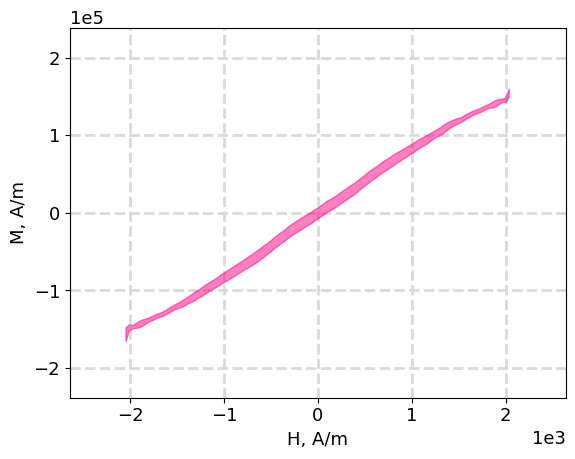

In [62]:
plt.fill_between(data_graph["H_mean"], 
                 data_graph["M_mean"] - data_graph["M_var"]**0.5,
                 data_graph["M_mean"] + data_graph["M_var"]**0.5,
                 color = raspberry_pink,
                 alpha = 0.5,
                 zorder = 10)
#plt.title("Sample magnetization depending on H-field")
plt.grid(c = (0.85, 0.85, 0.85), ls = '--', lw = 2)
plt.xlabel("H, А/m")
plt.ylabel("M, А/m")
plt.xlim(-Hlim, Hlim)
plt.ylim(-Ilim, Ilim)
plt.savefig(name + "_magnetisation.png")

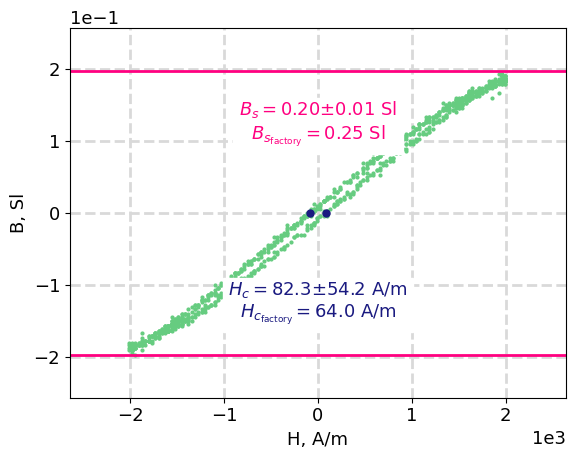

In [ ]:
plt.plot(data["H"].loc[:1000], data["B"].loc[:1000], 'o', markersize = 2, color = mint)
plt.hlines([B_s_mean, -B_s_mean], -Hlim, Hlim, colors = raspberry_pink)
plt.plot([-H_c_mean, H_c_mean], [0, 0], 'o', color = (0.1, 0.1, 0.5), markersize = 5)
plt.text(0, B_s_mean * 0.8, 
         (r"$B_s = $" + f"{B_s_mean:.2f}" + r"$\pm$" + f"{B_s_sigma:.2f} Sl\n" +
         r"$B_{s_\text{factory}} = $" + f"{B_s_table:.2f} Sl"), 
         color = raspberry_pink,
         ha = 'center',
         va = 'top',
         backgroundcolor = (1, 1, 1))
plt.text(0, -B_s_mean * 0.8, 
         (r"$H_c = $" + f"{H_c_mean:.1f}" + r"$\pm$" + f"{H_c_sigma:.1f} A/m\n"+
          r"$H_{c_\text{factory}} = $" + f"{H_c_table:.1f} A/m"),
         color = (0.1, 0.1, 0.5),
         ha = 'center',
         va = 'bottom',
         backgroundcolor = (1, 1, 1))
#plt.title("Hysteresis loop of the test sample")
plt.grid(c = (0.85, 0.85, 0.85), ls = '--', lw = 2)
plt.xlabel("H, А/m")
plt.ylabel("B, Sl")
plt.xlim(-Hlim, Hlim)
plt.ylim(-Blim, Blim)
plt.savefig(name + ".png")
#